# Homework 2
In this homework assignment, you will explore Auto-MPG Dataset. 

Dataset contains following attributes:
1. mpg (miles per gallon)
2. cylinders (number of cylinders, power unit of an engine)
3. displacement (total volume of all the cylinders in an engine, measured in cubic centimeters [cc])
4. horsepower: (the amount of power an engine develops)
5. weight: (weight of the car)
6. acceleration: (accelaration of the car)
7. year: (model year of the car, two digits representing the year from 19**)
8. origin: (shows the origin of the car, 1 for American, 2 for European and 3 for Asian)
9. car name: (unique name for each car)

You will explore the data types and scales, cardinalities, number of missing values, detect outliers, handle missing values and outliers and create data quality report for original and cleaned dataset.

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Read the dataset

In [4]:
adf = pd.read_csv('./auto-mpg.csv')

### Q1 (10 points)
Identify the data types (numerical [int, float], categorical) and data scales for all the attributes.

In [5]:
# Answer to Q1
adf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null int64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null int64
acceleration    406 non-null float64
year            406 non-null int64
origin          406 non-null int64
carname         406 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


| Attribute  | Data Type  | Data Scale |
|------------|------------|------------|
|     mpg    | numerical  |   ratio    |
|displacement| numerical  |   ratio    |
|horsepower  | numerical  |   ratio    |
|weight      | numerical  |   ratio    |
|year        | numerical  |   interval |
|origin      | categorical  |   nominal  |
|carname     | categorical  |   nominal  |




### Q2 (20 points)
Identify the cardinalities (number of unique values) and number of missing values for each attribute

In [6]:
# Your answer to Q2 goes here!
print('Number of null cells:\n{}'.format(adf.isnull().sum()))
print()
print('Number of uniques cells:\n{}'.format(adf.nunique()))

print()

for (name, series) in adf.iteritems():
    print('ANALYZING THE COLUMN:', name)
    print('\tTotal number of records', series.size)
    print('\tNumber of missing values', series.isnull().sum()) 
    print('\tPercentage of missing values {0}%'.format(((series.isnull().sum()/series.size)*100)) )
    print('\tNumber of unique values', series.unique().size)


Number of null cells:
mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
carname         0
dtype: int64

Number of uniques cells:
mpg             129
cylinders         6
displacement     83
horsepower       93
weight          357
acceleration     96
year             13
origin            3
carname         312
dtype: int64

ANALYZING THE COLUMN: mpg
	Total number of records 406
	Number of missing values 8
	Percentage of missing values 1.9704433497536946%
	Number of unique values 130
ANALYZING THE COLUMN: cylinders
	Total number of records 406
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 6
ANALYZING THE COLUMN: displacement
	Total number of records 406
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 83
ANALYZING THE COLUMN: horsepower
	Total number of records 406
	Number of missing values 6
	Percentage of missing va

### Q3 (20 points)
Visualize the distribution of each attribute (other than carname, since it is unique). Note here that for nominal and ordinal scale attributes, use bar plots. For ratio and interval scale attributes, use histograms.

Hint: To get the counts of numerical (but also nominal) attributes, you can use `value_counts()` method.


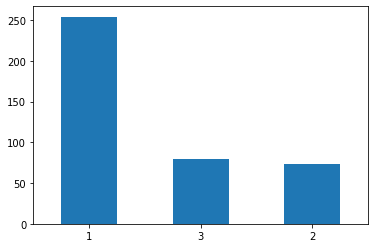

In [7]:
# For categorical attribute

df_for_bar = adf['origin']
thing = df_for_bar.value_counts()
ax = thing.plot.bar(x='origin',rot=0)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ca69350>,
      dtype=object)

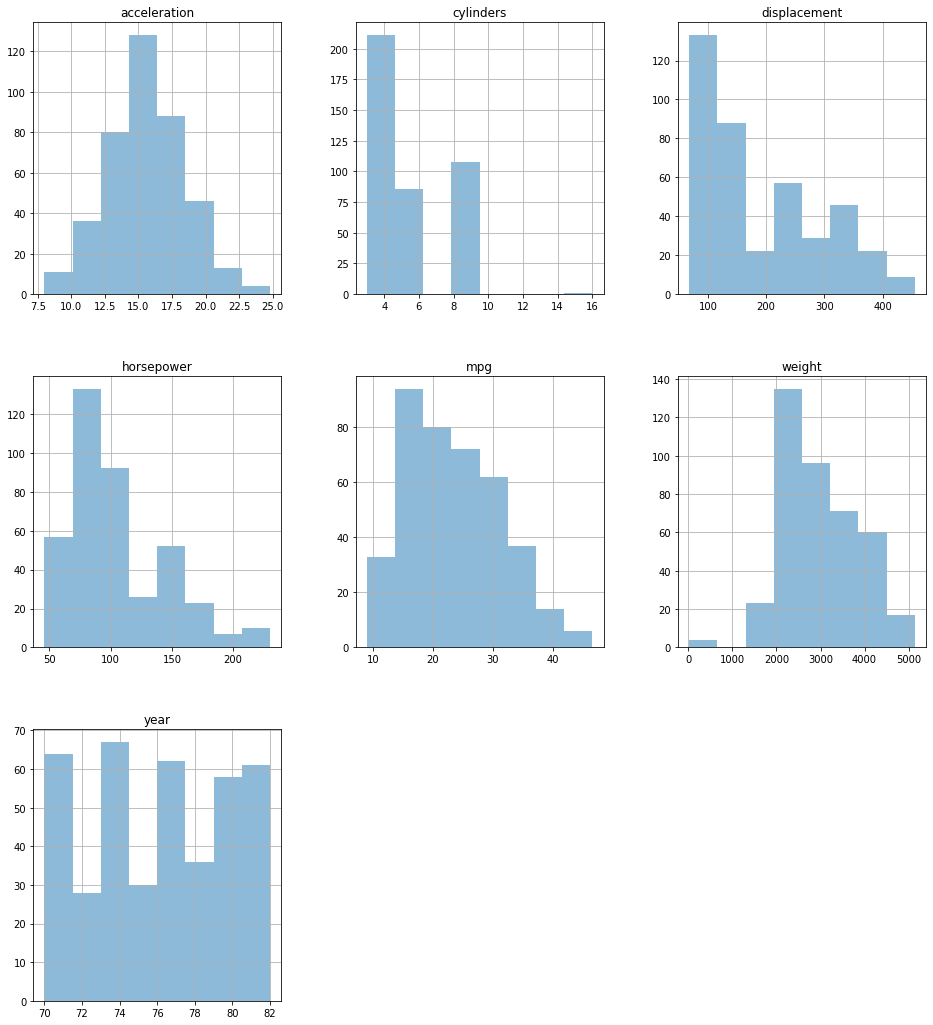

In [8]:
# For numerical attributes
col_list = []
for (name, series) in adf.iteritems():
    if series.dtype != 'object' and name != 'origin':
        col_list.append(name)
df_for_hist = adf[col_list]
df_for_hist.hist(bins=8, alpha=0.5, figsize=(16,18))



### Q4 (20 points)
Using your favorite outlier detection method, identify the outliers for each attribute (other than year, origin, and carname). For each outlier, remove the outlier or replace with a default value.

Hint 1: For simplicity, you can use $\mu \pm 2\sigma$ (alternatively, $3\sigma$) or the interval between $Q1-1.5IQR$ and $Q3+1.5IQR$.

Hint 2: To replace, you can use the median/mean value or minimum/maximum value depending on the direction of the outlier.


In [9]:
# Answer to Q4 goes here
adf2 = adf[['acceleration', 'cylinders', 'displacement', 'horsepower', 'mpg', 'weight']]
Q1 = adf2.quantile(0.25)
Q3 = adf2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#working code to drop ouliers ->
adf_out = adf2[~((adf2 < (Q1 - 1.5 * IQR)) |(adf2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(adf_out.shape)
print(adf_out)



acceleration       3.475
cylinders          4.000
displacement     197.000
horsepower        54.250
mpg               11.500
weight          1392.000
dtype: float64
(386, 6)
     acceleration  cylinders  displacement  horsepower   mpg  weight
0            12.0          8         307.0       130.0  18.0    3504
1            11.5          8         350.0       165.0  15.0    3693
2            11.0          8         318.0       150.0  18.0    3436
3            12.0          8         304.0       150.0  16.0    3433
4            10.5          8         302.0       140.0  17.0    3449
..            ...        ...           ...         ...   ...     ...
400          17.3          4         151.0        90.0  27.0    2950
401          15.6          4         140.0        86.0  27.0    2790
403          11.6          4         135.0        84.0  32.0    2295
404          18.6          4         120.0        79.0  28.0    2625
405          19.4          4         119.0        82.0  31.0    272

### Q5 (10 points)
Handle the missing values you found in Q2 using kNN imputation. Use `KNNImputer` from `sklearn.imputer` for this task. Set the number of neighbors to 3 and use the column subset of `['cylinders', 'displacement', 'weight']` for imputation.

In [10]:
# Answer to Q5 goes here

from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)
impute_copy = adf[['mpg', 'horsepower', 'cylinders', 'displacement', 'weight']].copy()

# your code ....
knn_imputer.fit_transform(impute_copy[['cylinders', 'displacement', 'weight']])

array([[   8.,  307., 3504.],
       [   8.,  350., 3693.],
       [   8.,  318., 3436.],
       ...,
       [   4.,  135., 2295.],
       [   4.,  120., 2625.],
       [   4.,  119., 2720.]])

### Q6 (20 points)
Create a Scatter Plot Matrix (a pair plot) of attributes. Use `origin` map plot aspects to different colors. Based on the SPLOM, answer the following questions.

#### Q6.a -  What can you say about the relationship between cylinders and mpg values?
#### Q6.b -  What can you say about the cylinders of Asian cars (origin = 3)?
#### Q6.c -  Is there a correlation between weight and displacement?

Hint: Use keyword argument `hue='origin'` and `markers` to see the differences of cars with different origins.


6a)
When cylinders increase mpg goes down, so cylinders have an inverse relationship

6b)
Asian cars have the least amount of cylinders

6c)
weight and displacement are correlated positivly 

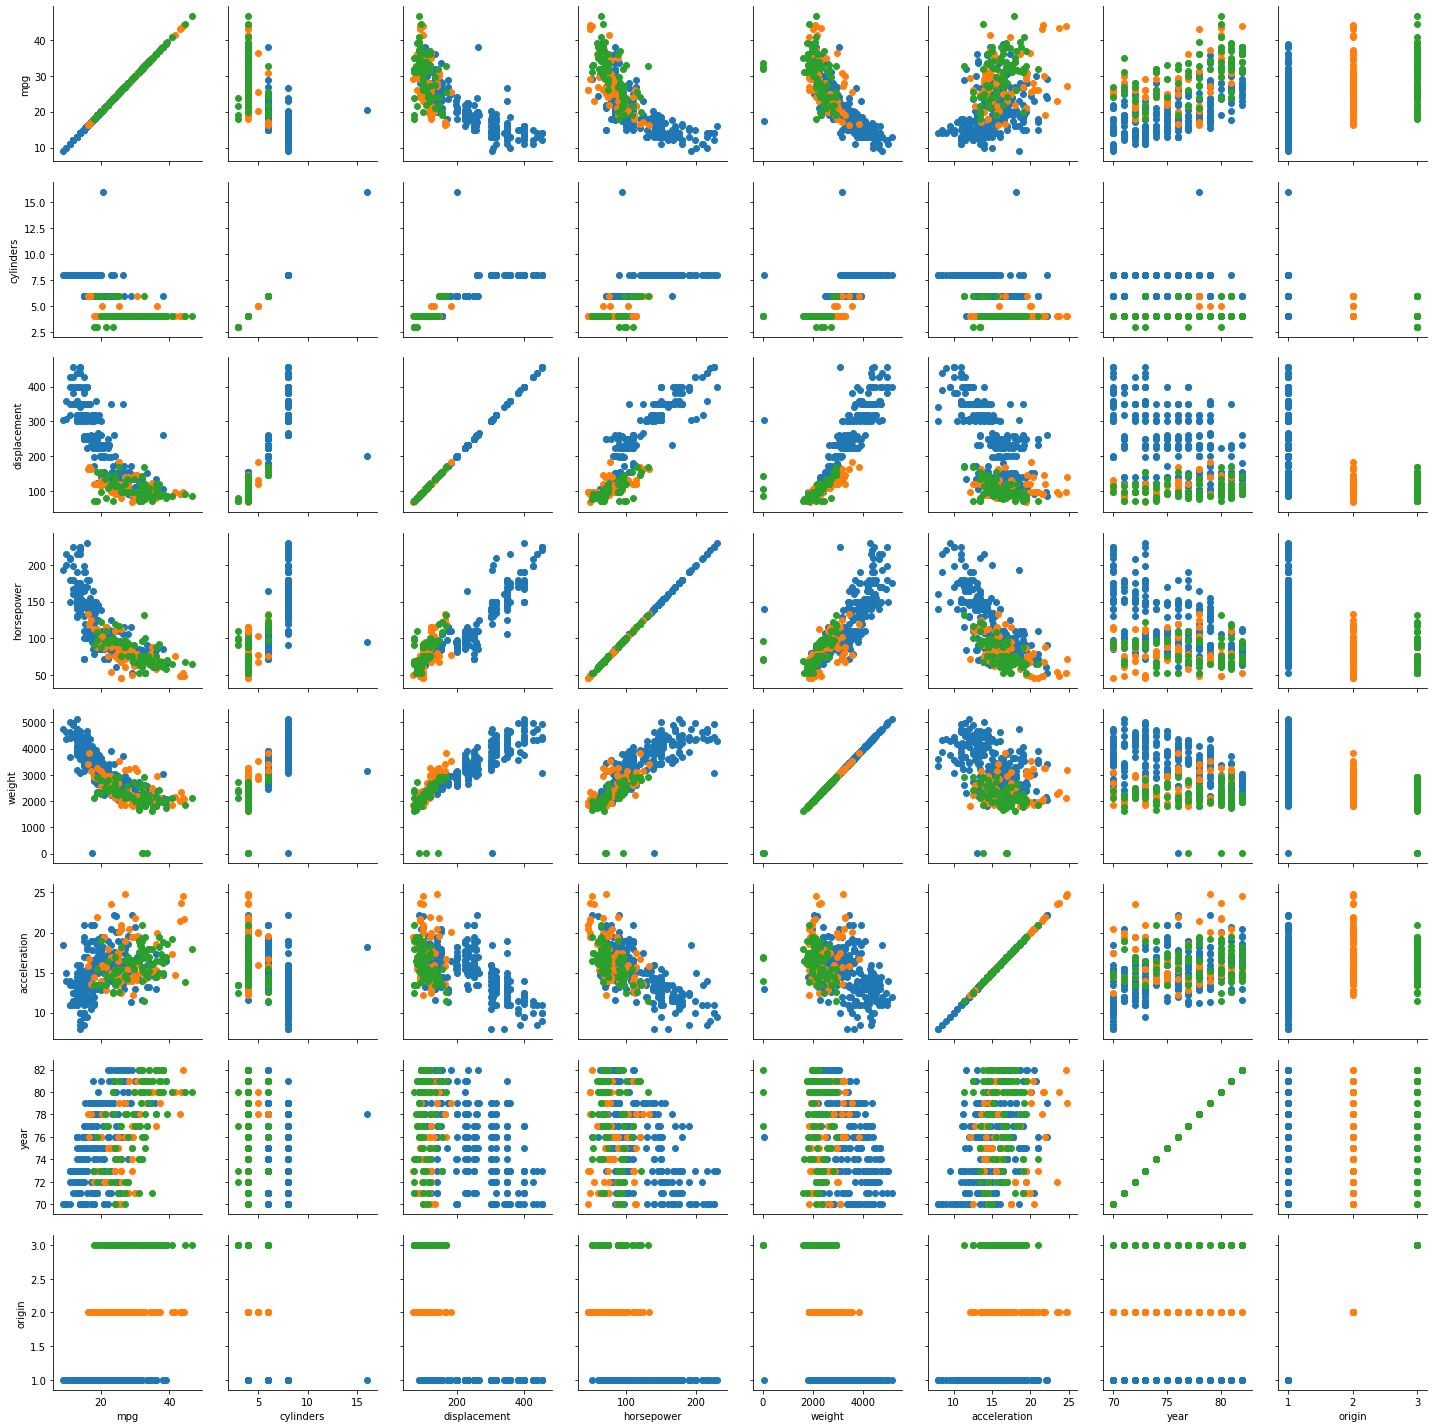

In [14]:
import seaborn as sns

# you answer to Q6 goes here...
df_for_scatter = adf._get_numeric_data()
out = df_for_scatter.dropna()
l = sns.PairGrid(df_for_scatter, hue = 'origin')
l.map(plt.scatter)

### Bonus Question (20 points)

Create a data quality report for the Auto-MPG dataset. 

Provide the data quality tables, distributions of categorical and nominal variables.

Also provide your solutions for handling outliers and missing values. 

Create the data quality tables after handling outliers and missing values.

Provide this as a separate PDF file. You can use the cells below to find statistics and create visualizations.


In [17]:
mpg_adf = adf['mpg']
mpg_adf_out = mpg_adf._get_numeric_data()
out = mpg_adf_out.dropna()